# Convolutional Networks


Convolutional networks(LeCun, 1989), also known as convolutional neural networks, or CNNs, are a specialized kind of neural network for processing datathat has a known grid-like topology. Examples include time-series data, which canbe thought of as a 1-D grid taking samples at regular time intervals, and image data,which can be thought of as a 2-D grid of pixels. Convolutional networks have beentremendously successful in practical applications. The name “convolutional neuralnetwork” indicates that the network employs a mathematical operation calledconvolution. Convolution is a specialized kind of linear operation. Convolutional networks are simply neural networks that use convolution in place of general matrixmultiplication in at least one of their layers.

@source{{\url{http://www.deeplearningbook.org}}}

## Let's check a simple example of how CNNs are effective

Let's fit the MNIST dataset with and without CNNs

In [7]:
import tensorflow as tf
from tensorflow.keras import datasets
#import the data
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

11490434/11490434 [==============================] - 0s 0us/step


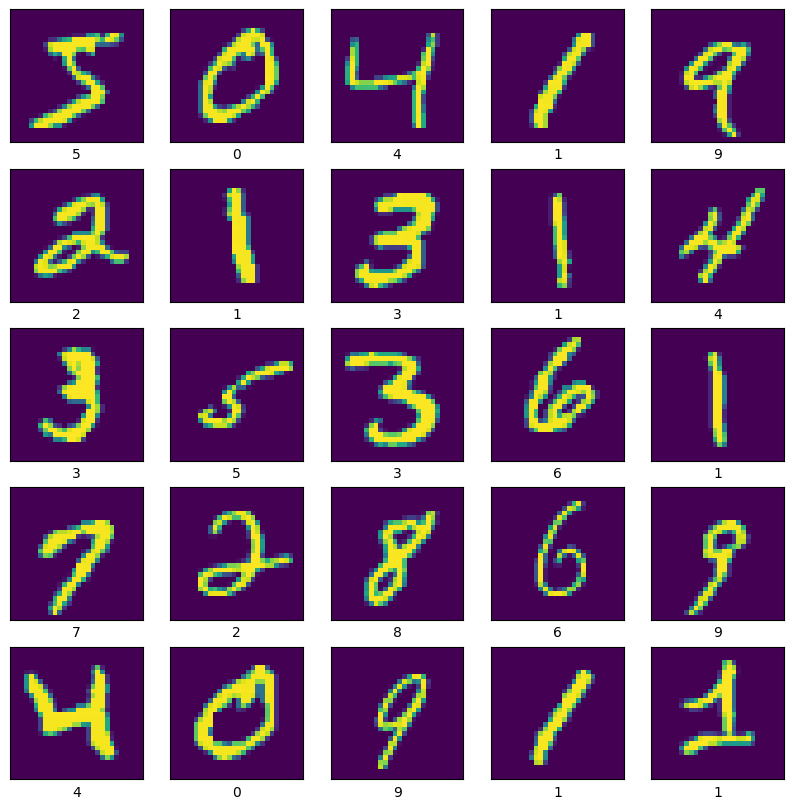

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(str(train_labels[i]))
plt.show()

*   Flatten: The primary purpose of the Flatten layer is to prepare the data for the fully connected (Dense) layers that follow. Dense layers require one-dimensional input, whereas the earlier layers in a CNN typically work with multi-dimensional feature maps. The Flatten layer bridges this gap by reshaping the data.
*   Dense: Dense layers are responsible for learning high-level features and making final predictions. They capture complex relationships between the features extracted by the earlier convolutional and pooling layers. The output of the Dense layer typically represents class scores or probabilities for various classes in classification tasks.

The Flatten layer doesn't introduce any new parameters. It reshapes the data without changing the number of parameters.The number of parameters in a Dense layer depends on two main factors:
1. The number of neurons (units) in the layer.
2. The number of input neurons from the previous layer.
- Parameters = (number of input neurons) * (number of neurons in the layer) + (number of neurons in the layer)


In [9]:
n1=784*20+20
print(n1)

15700


In [10]:
#Now let's build the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10)
])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dense_3 (Dense)             (None, 20)                420       
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
Total params: 17170 (67.07 KB)
Trainable params: 17170 (

In [11]:
#Comple the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
#train
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 4ms/step - loss: 0.4436 - accuracy: 0.8654
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2151 - accuracy: 0.9367
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1737 - accuracy: 0.9489
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1520 - accuracy: 0.9547
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1372 - accuracy: 0.9590
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1238 - accuracy: 0.9635
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1137 - accuracy: 0.9658
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1072 - accuracy: 0.9667
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0999 - accuracy: 0.9697
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.09

In [13]:
#Let's test its accuracy!
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.1331 - accuracy: 0.9630 - 767ms/epoch - 2ms/step

Test accuracy: 0.9629999995231628


### Let's now build our first CNN

Convolutional layers are introduced in image classification tasks for several important reasons:

1. Feature Extraction: Convolutional layers are specifically designed to capture and extract spatial hierarchies of features in an image. They use convolution operations to detect various patterns, textures, and edges at different levels of abstraction. This hierarchical feature extraction is crucial for recognizing complex patterns in images.

2. Parameter Sharing: Convolutional layers share a small set of learnable parameters (kernels or filters) across the entire image, making them computationally efficient and capable of handling large images. This parameter sharing also enables the network to be invariant to translations, which is a desirable property for recognizing objects in different positions within an image.

3. Local Receptive Fields: Convolutional layers work on small, local regions of the input (receptive fields) and slide these receptive fields across the entire image. This local processing allows the network to focus on local details and gradually build up a representation of the entire image.

4. Reduced Spatial Dimensions: Convolutional layers often use pooling operations (e.g., max pooling) to reduce the spatial dimensions of the feature maps. This spatial reduction helps in reducing the computational load and also makes the network more robust to variations in object position and scale.

5. Hierarchical Representation: Convolutional neural networks (CNNs) typically consist of multiple convolutional layers stacked on top of each other. Each layer learns increasingly abstract and complex features, leading to a hierarchical representation of the input image. This hierarchical representation is beneficial for capturing intricate patterns and structures.

6. Translation Invariance: Convolutional layers provide translation-invariant representations. This means that the network can recognize patterns regardless of their exact position in the image. This property is particularly useful in image classification tasks where the position of an object in an image can vary.

In [14]:
from tensorflow import keras
from tensorflow.keras import layers

#
train_images= train_images.reshape(-1, 28, 28, 1)

model = model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(10, activation="softmax"),
    ]
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dropout (Dropout)           (None, 800)              

(None, 26, 26, 32) describes a 2D convolutional layer's output where:

- The batch size can vary (indicated by None).
- The output feature maps have a height of 26 pixels.
- The output feature maps have a width of 26 pixels.
- There are 32 feature maps (channels) in the output, each containing different feature information.

The number of parameters in a 2D convolutional layer depends on several factors:

1. Number of filters (also called kernels) in the layer.
2. Size of each filter (usually specified as a height and width).
3. Number of input channels (e.g., 3 for RGB images).

- Parameters = (filter height * filter width * number of input channels + 1) * number of filters


In [15]:
n2=(3 * 3 * 32 + 1) * 32
n2

9248

In [16]:
#Comple the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#train
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 13s 4ms/step - loss: 0.2198 - accuracy: 0.9328
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0772 - accuracy: 0.9761
Epoch 3/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0587 - accuracy: 0.9811


In [17]:
#Let's test its accuracy!

test_images= test_images.reshape(-1, 28, 28, 1)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0447 - accuracy: 0.9857 - 1s/epoch - 3ms/step

Test accuracy: 0.9857000112533569


we have seen how we can boost our perfromance just by changing the type of network to CNN!

### Let's break down what we did !

In [18]:
# What is this?
train_images= train_images.reshape(-1, 28, 28, 1)

In [19]:
import numpy as np
m = np.array([[1, 2, 3, 4],
          [5, 6, 7, 8],
          [9, 10, 11, 12]])
m.shape

(3, 4)

In [20]:
m.reshape(-1) #The -1 is a placeholder for an unknown dimension

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [21]:
m.reshape(-1, 2)


array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10],
       [11, 12]])

So this implies that **the row value is inferred from the length of the array and remaining dimensions**

In [22]:
#here we specify the input shape (28 pixels, 28 pixels, 1 channel (black/white (greyscale)))
keras.Input(shape=(28, 28, 1))

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'input_2')>

In [23]:
# We have 32 kernels (filters) with size 3 pixels by 3 pixles,  relu is applied right after the elemental-wise product
layers.Conv2D(32, kernel_size=(3, 3), activation="relu")

![alt text](https://d2l.ai/_images/conv-pad.svg "Title")
source: https://d2l.ai/chapter_convolutional-neural-networks/padding-and-strides.html

In [24]:
# Pooling is not a real neural layer. It is an operation layer as show below
# You see that we are choosing a filter size of 2x2 pixels
layers.MaxPooling2D(pool_size=(2, 2))

![alt text](https://d2l.ai/_images/pooling.svg "Title")
source: https://d2l.ai/chapter_convolutional-neural-networks/pooling.html

### Flatten layer
A flatten layer collapses the spatial dimensions of the input into the channel dimension

In [25]:
layers.Flatten()

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dropout (Dropout)           (None, 800)              

In [27]:
5*5*32

800

In [28]:
#randomly setting a fraction of the input units (neurons) to zero during each training step, prevents the network from relying too heavily on specific neurons and forces it to learn more robust and generalized features.
layers.Dropout(0.2)

![alt text](https://d2l.ai/_images/dropout2.svg "Title")
source: https://d2l.ai/chapter_multilayer-perceptrons/dropout.html

The method is called dropout because we literally drop out some neurons during training.


In [29]:
# Just another dense layer to do the classification!
layers.Dense(10, activation="softmax")

## Let's now train a more complex dataset and apply advanced options!

### Regularization

When addressing with overfitting, regularization is a typical approach.
To decrease the complexities of the trained models, it introduces a penalty function to the  loss function.

class L1: A regularizer that applies a L1 regularization penalty.

class L1L2: A regularizer that applies both L1 and L2 regularization penalties.

class L2: A regularizer that applies a L2 regularization penalty.

class Regularizer: Regularizer base class.

class l1: A regularizer that applies a L1 regularization penalty.

class l2: A regularizer that applies a L2 regularization penalty.

In [30]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 4s 0us/step


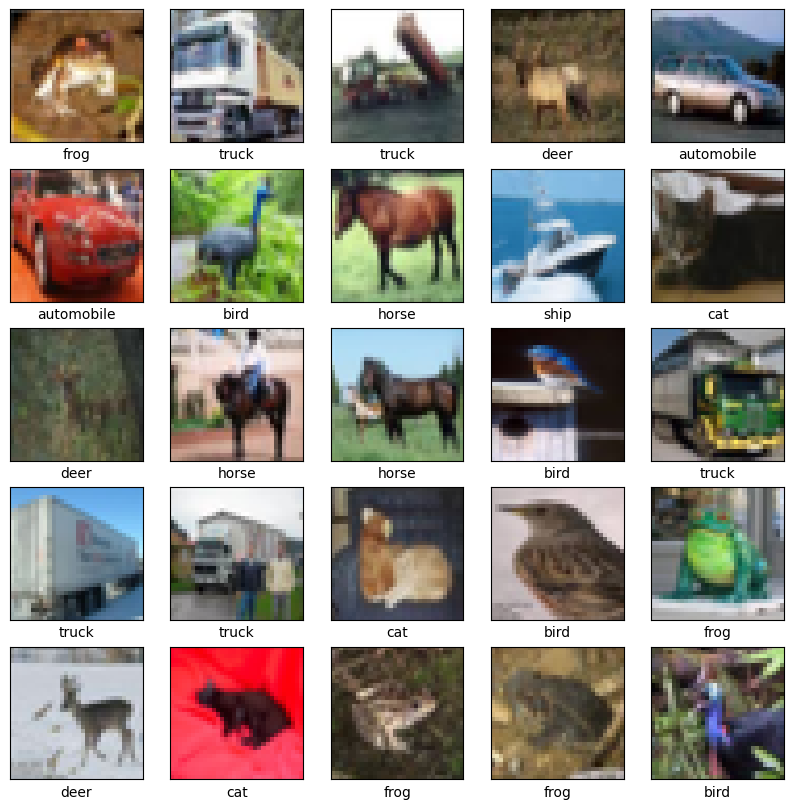

In [31]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

- Parameters = (filter height * filter width * number of input channels + 1) * number of filters

In [32]:
n=(3 * 3 * 3 + 1) * 16
n

448

In [33]:
from tensorflow.keras import models
# Define the model
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 64)         

In [35]:
# Let's add dense layers with regularization!
model.add(layers.Flatten())
model.add(layers.Dense(64, kernel_regularizer='l2', activation='relu'))
model.add(layers.Dense(10))

In [36]:
# Compile and train
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20,
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 12s 6ms/step - loss: 1.7378 - accuracy: 0.4012 - val_loss: 1.4738 - val_accuracy: 0.4904
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3979 - accuracy: 0.5229 - val_loss: 1.3196 - val_accuracy: 0.5470
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2737 - accuracy: 0.5706 - val_loss: 1.2137 - val_accuracy: 0.5980
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1922 - accuracy: 0.6039 - val_loss: 1.1744 - val_accuracy: 0.6050
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1328 - accuracy: 0.6257 - val_loss: 1.1367 - val_accuracy: 0.6295
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0819 - accuracy: 0.6458 - val_loss: 1.0944 - val_accuracy: 0.6352
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0387 - accuracy: 0.6603 - val_loss: 1.1177 - val_accuracy

313/313 - 1s - loss: 0.9389 - accuracy: 0.7037 - 1s/epoch - 4ms/step


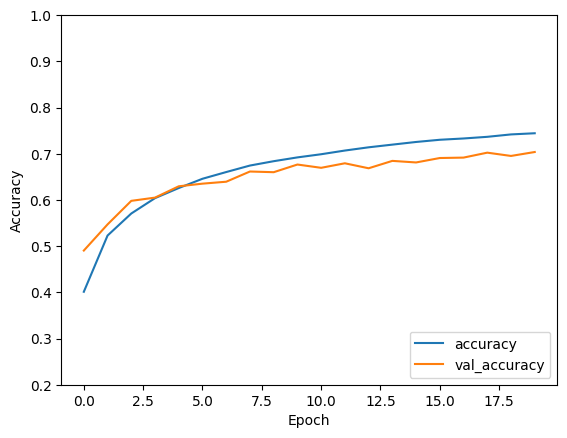

In [37]:
# Evaluate the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

### Let's do it without regularization

In [38]:
# Define the model
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Let's add dense layers with regularization!
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# Compile and train
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20,
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5516 - accuracy: 0.4315 - val_loss: 1.2720 - val_accuracy: 0.5454
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2144 - accuracy: 0.5691 - val_loss: 1.1964 - val_accuracy: 0.5839
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0852 - accuracy: 0.6176 - val_loss: 1.0661 - val_accuracy: 0.6255
Epoch 4/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9897 - accuracy: 0.6531 - val_loss: 1.0029 - val_accuracy: 0.6491
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9201 - accuracy: 0.6777 - val_loss: 0.9990 - val_accuracy: 0.6503
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8623 - accuracy: 0.6998 - val_loss: 0.9813 - val_accuracy: 0.6631
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8145 - accuracy: 0.7142 - val_loss: 0.9321 - val_accuracy

313/313 - 1s - loss: 1.0543 - accuracy: 0.6926 - 687ms/epoch - 2ms/step


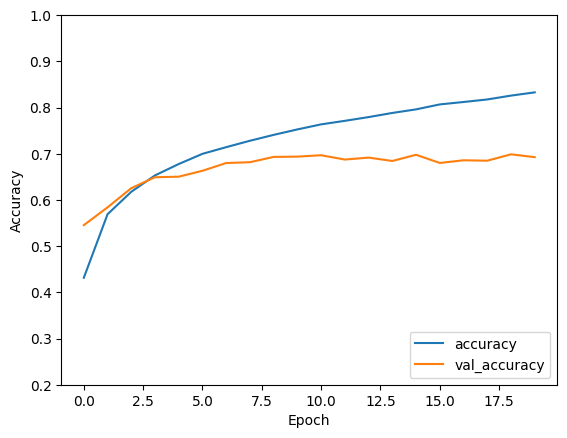

In [39]:
# Evaluate the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

### Data Augmentation

A technique to increase the diversity of your training set by applying random (but realistic) transformations such as image rotation. You will learn how to apply data augmentation in two ways. First, you will use Keras Preprocessing Layers. Next, you will use tf.image.

A Google colab version can be found here:https://www.tensorflow.org/tutorials/images/data_augmentation

In [40]:
#!pip install --upgrade protobuf

In [41]:
import pandas as pd
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds

In [42]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [43]:
#There are five different kinds of flowers here
num_classes = metadata.features['label'].num_classes
print(num_classes)

5


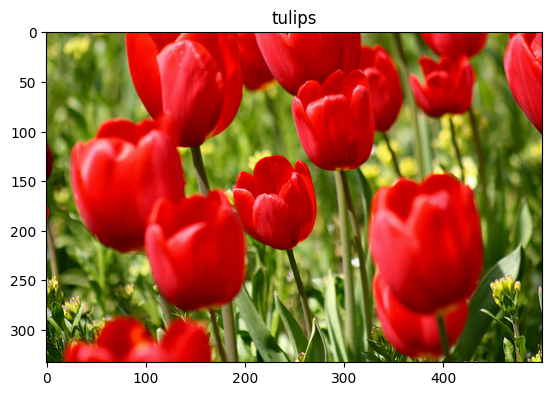

In [44]:
#Let's augment an image
get_label_name = metadata.features['label'].int2str

image, label = next(iter(train_ds))
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

In [45]:
IMG_SIZE = 180

resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255)
])

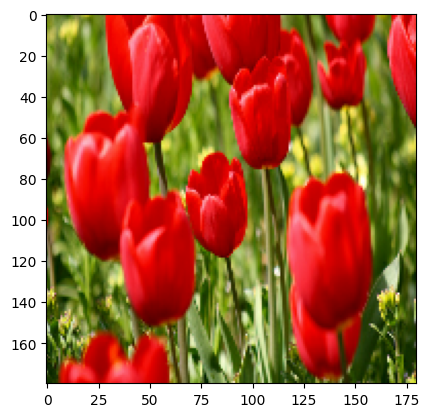

In [46]:
#resizing and scaling
result = resize_and_rescale(image)
_ = plt.imshow(result)

In [47]:
#Let's do some flips!
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [48]:
# Add the image to a batch
image = tf.expand_dims(image, 0)

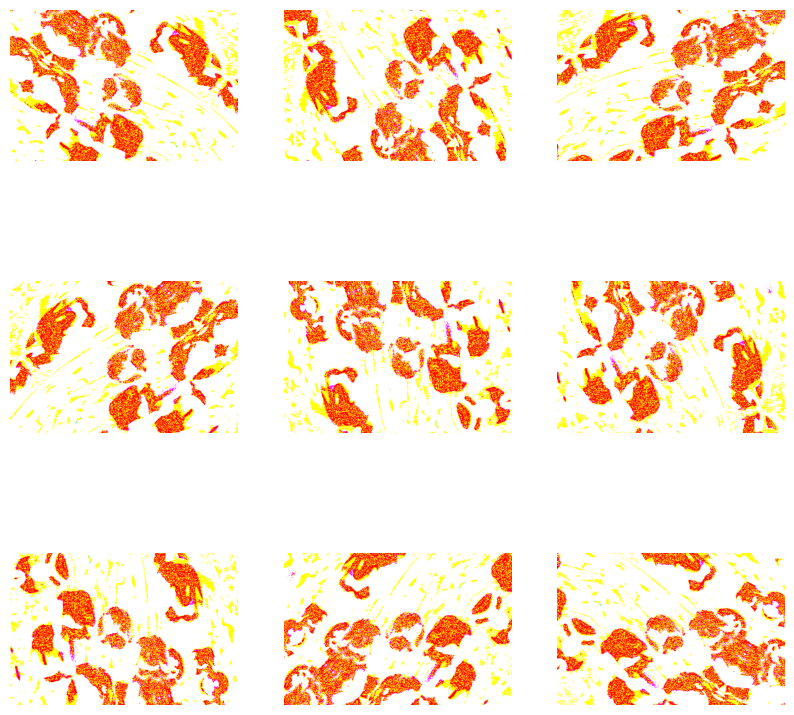

In [49]:
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

### You have two options with data augmentation

Option 1: Make the preprocessing layers part of your model:

In [50]:
model = tf.keras.Sequential([
  resize_and_rescale,
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # Rest of your model
])

Option 2: Apply the preprocessing layers to your dataset

In [51]:
aug_ds = train_ds.map(
  lambda x, y: (resize_and_rescale(x, training=True), y))

In [52]:
# Let's do the second option!
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE

def prepare(ds, shuffle=False, augment=False):
  # Resize and rescale all datasets
  ds = ds.map(lambda x, y: (resize_and_rescale(x), y),
              num_parallel_calls=AUTOTUNE)

  if shuffle:
    ds = ds.shuffle(1000)

  # Batch all datasets
  ds = ds.batch(batch_size)

  # Use data augmentation only on the training set
  if augment:
    ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y),
                num_parallel_calls=AUTOTUNE)

  # Use buffered prefecting on all datasets
  return ds.prefetch(buffer_size=AUTOTUNE)

In [53]:
train_ds = prepare(train_ds, shuffle=True, augment=True)
val_ds = prepare(val_ds)
test_ds = prepare(test_ds)

In [54]:
model = tf.keras.Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [55]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [56]:
epochs=5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
92/92 [==============================] - 19s 148ms/step - loss: 1.2732 - accuracy: 0.4601 - val_loss: 1.1252 - val_accuracy: 0.5613
Epoch 2/5
92/92 [==============================] - 12s 122ms/step - loss: 1.0632 - accuracy: 0.5712 - val_loss: 0.9954 - val_accuracy: 0.6022
Epoch 3/5
92/92 [==============================] - 11s 113ms/step - loss: 0.9747 - accuracy: 0.6151 - val_loss: 1.1058 - val_accuracy: 0.5259
Epoch 4/5
92/92 [==============================] - 12s 121ms/step - loss: 0.9018 - accuracy: 0.6376 - val_loss: 0.9016 - val_accuracy: 0.6431
Epoch 5/5
92/92 [==============================] - 12s 121ms/step - loss: 0.8547 - accuracy: 0.6635 - val_loss: 0.8657 - val_accuracy: 0.6621


In [57]:
loss, acc = model.evaluate(test_ds)
print("Accuracy", acc)

12/12 [==============================] - 1s 47ms/step - loss: 0.8262 - accuracy: 0.6703
Accuracy 0.6702997088432312


### You can also customize augmentation!
You can also create custom data augmenation layers. This tutorial shows two ways of doing so. First, you will create a layers.Lambda layer. This is a good way to write concise code. Next, you will write a new layer via subclassing, which gives you more control. Both layers will randomly invert the colors in an image, according to some probability.

In [58]:
def random_invert_img(x, p=0.5):
  if  tf.random.uniform([]) < p:
    x = (255-x)
  else:
    x
  return x

In [59]:
def random_invert(factor=0.5):
  return layers.Lambda(lambda x: random_invert_img(x, factor))

random_invert = random_invert()

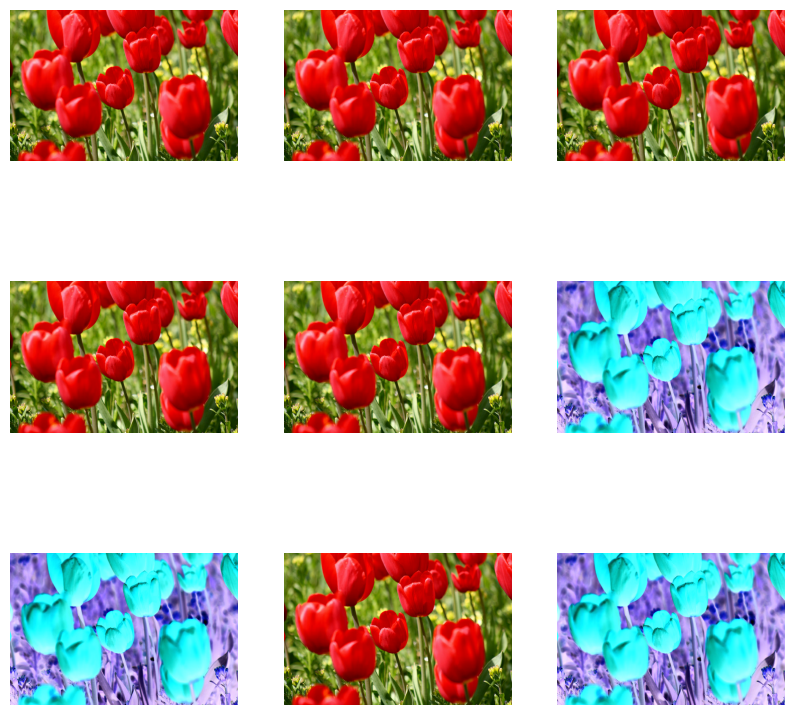

In [60]:
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = random_invert(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0].numpy().astype("uint8"))
  plt.axis("off")

In [61]:
#Next, implement a custom layer by subclassing
class RandomInvert(layers.Layer):
  def __init__(self, factor=0.5, **kwargs):
    super().__init__(**kwargs)
    self.factor = factor

  def call(self, x):
    return random_invert_img(x)

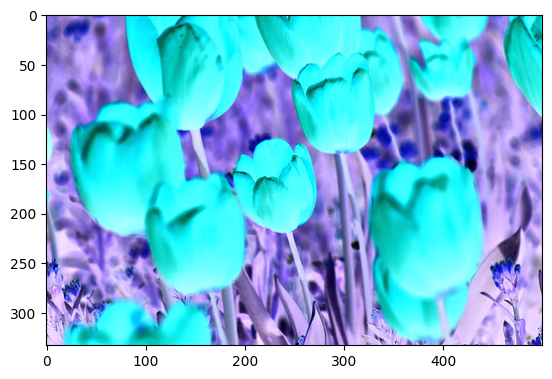

In [62]:
plt.imshow(RandomInvert()(image)[0])

#### Applying data augmentation to a dataset

From the second option, you also have two options:
- Option 1: Using tf.data.experimental.Counter()
- Option 2: Using tf.random.Generator

In [63]:
#Let's first redownload the dataset
(train_datasets, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

# Let's define a utility function for resizing and rescaling the images

def resize_and_rescale(image, label):
  image = tf.cast(image, tf.float32)
  image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
  image = (image / 255.0)
  return image, label

#Let's also define augment function that can apply the random transformations to the images
def augment(image_label, seed):
  image, label = image_label
  image, label = resize_and_rescale(image, label)
  image = tf.image.resize_with_crop_or_pad(image, IMG_SIZE + 6, IMG_SIZE + 6)
  # Make a new seed
  new_seed = tf.random.experimental.stateless_split(seed, num=1)[0, :]
  # Random crop back to the original size
  image = tf.image.stateless_random_crop(
      image, size=[IMG_SIZE, IMG_SIZE, 3], seed=seed)
  # Random brightness
  image = tf.image.stateless_random_brightness(
      image, max_delta=0.5, seed=new_seed)
  image = tf.clip_by_value(image, 0, 1)
  return image, label

- Option 1: Using tf.data.experimental.Counter()

In [64]:
# Create counter and zip together with train dataset
counter = tf.data.experimental.Counter()

train_ds = tf.data.Dataset.zip((train_datasets, (counter, counter)))

# Map the augment function to the training dataset
train_ds = (
    train_ds
    .shuffle(1000)
    .map(augment, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)


val_ds = (
    val_ds
    .map(resize_and_rescale, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)


test_ds = (
    test_ds
    .map(resize_and_rescale, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)

Instructions for updating:
Use `tf.data.Dataset.counter(...)` instead.


- Option 2:  Using tf.random.Generator

In [65]:
# Create a generator
rng = tf.random.Generator.from_seed(123, alg='philox')

# A wrapper function for updating seeds
def f(x, y):
  seed = rng.make_seeds(2)[0]
  image, label = augment((x, y), seed)
  return image, label

#Map the wrapper function f to the training dataset.

train_ds = (
    train_datasets
    .shuffle(1000)
    .map(f, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)


val_ds = (
    val_ds
    .map(resize_and_rescale, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)

test_ds = (
    test_ds
    .map(resize_and_rescale, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)

References:
https://www.tensorflow.org/tutorials